### PyCaretでモデル作成

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycaret.classification import *

In [2]:
df = pd.read_csv('gochopa.csv', index_col=0)
df.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,cls
count,3033.000000,3033.000000,3033.000000,3033.000000,3033.000000,3033.000000,3033.000000,3033.000000,3033.000000,3033.000000,3033.000000,3033.000000,3033.000000,3033.000000,3033.000000,3033.000000,3033.000000,3033.000000,3033.000000,3033.000000,3033.000000
mean,70.094426,124.180579,163.303544,193.072806,157.483197,213.686974,226.640913,238.835995,153.515255,215.826543,227.560278,242.880238,146.457552,198.024538,186.053491,181.923705,140.277220,177.218029,169.509855,165.971290,0.966700
std,15.580210,24.139254,28.659160,31.706427,26.493691,30.697428,43.826833,68.377647,24.514960,31.139900,59.826854,89.087529,23.020985,29.359263,55.046405,81.578558,22.024022,26.376745,44.242448,64.998483,0.836115
min,39.496835,73.464277,99.055540,113.472464,93.193347,131.916640,113.340196,89.565618,94.292099,132.461315,94.810337,73.116346,87.068938,118.915937,80.653580,62.585941,85.287748,109.786156,81.572054,66.317419,0.000000
25%,57.393379,104.604015,139.645981,166.391106,139.488351,192.304446,197.192799,177.369670,137.062030,195.210143,180.903289,148.317228,129.556937,175.835150,144.270579,119.457105,124.161186,157.626140,136.945245,118.232821,0.000000
50%,65.992424,120.768373,162.043204,193.103599,154.547727,212.793327,229.447162,259.811470,152.236658,216.208233,237.290961,271.191814,144.903416,197.458856,172.273039,146.754898,138.032605,176.524786,159.367500,137.829605,1.000000
75%,81.572054,144.779142,184.991892,213.152528,176.218614,237.105462,257.015564,291.432668,170.235132,237.132874,276.801373,317.045738,161.387732,220.043178,229.141877,264.170400,155.428440,195.783043,201.082073,226.691420,2.000000
max,119.620232,202.563570,250.864505,292.453415,239.486952,318.014151,328.129548,376.998674,238.585414,301.252386,340.631766,394.284161,228.790297,275.439649,318.982758,374.779935,215.278889,250.313803,293.204707,332.661991,2.000000


In [3]:
from sklearn.model_selection import train_test_split

seed = 27
# X = df.iloc[:,0:20]
# y = df.iloc[:,20]
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=seed)
df_train, df_test = train_test_split(df, train_size=0.8, random_state=seed)

In [4]:
exp_name = setup(data=df_train, target='cls', test_data=df_test, session_id=123)
# exp_name = setup(data=df_train, target='cls', test_data=df_test, pca=True, pca_components=10, session_id=123)

,Description,Value
0,session_id,123
1,Target,cls
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(2426, 21)"
5,Missing Values,False
6,Numeric Features,20
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


create_model_container: 0
master_model_container: 0
display_container: 1
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='cls',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
                

In [5]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.7990
knn,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0590
svm,SVM - Linear Kernel,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0280
ridge,Ridge Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0140
qda,Quadratic Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0170
lda,Linear Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0170
et,Extra Trees Classifier,0.9996,1.0000,0.9996,0.9996,0.9996,0.9994,0.9994,0.2340
lightgbm,Light Gradient Boosting Machine,0.9996,1.0000,0.9996,0.9996,0.9996,0.9994,0.9994,0.1880
rf,Random Forest Classifier,0.9992,1.0000,0.9992,0.9992,0.9992,0.9988,0.9988,0.2830
catboost,CatBoost Classifier,0.9992,1.0000,0.9991,0.9992,0.9992,0.9988,0.9988,11.1990


create_model_container: 16
master_model_container: 16
display_container: 2
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
compare_models() succesfully completed......................................


In [13]:
# ridge = create_model('ridge')
# qda = create_model('qda')   # Quadratic Discriminant Analysis
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


create_model_container: 19
master_model_container: 19
display_container: 6
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)
create_model() succesfully completed......................................


In [14]:
# tuned_qda = tune_model(qda, n_iter = 30)
tuned_ridge = tune_model(ridge, n_iter = 30)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


create_model_container: 20
master_model_container: 20
display_container: 7
RidgeClassifier(alpha=7.73, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)
tune_model() succesfully completed......................................


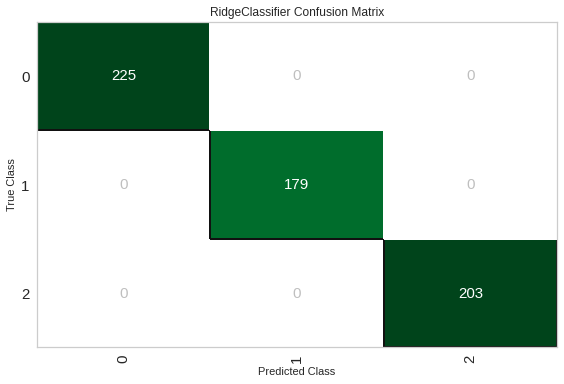

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [21]:
plot_model(tuned_ridge, plot = 'confusion_matrix')

In [22]:
# final_qda = finalize_model(tuned_qda)
final_ridge = finalize_model(tuned_ridge)
print(final_ridge)

save_model(final_ridge,'Final_Ridge_Model')

Initializing finalize_model()
finalize_model(estimator=RidgeClassifier(alpha=7.73, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001), fit_kwargs=None, groups=None, model_only=True, display=None)
Finalizing RidgeClassifier(alpha=7.73, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)
Initializing create_model()
create_model(estimator=RidgeClassifier(alpha=7.73, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, verbose=False, system=False, metrics=None, add_to_model_list=False, probability_threshold=None, display=None, kwargs={})
Checking exceptions
Importing librarie

RidgeClassifier(alpha=7.73, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='cls',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                 ('fix_perfect', Remove_100(target='cls')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
            

In [12]:
saved_final_qda = load_model('Final_QDA_Model')

Initializing load_model()
load_model(model_name=Final_QDA_Model, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [27]:
data_unseen = df_test.iloc[0:30]
unseen_predictions = predict_model(final_ridge, data=data_unseen)
unseen_predictions

Initializing predict_model()
predict_model(estimator=RidgeClassifier(alpha=7.73, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001), probability_threshold=None, encoded_labels=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None)
Checking exceptions
Preloading libraries
Preparing display monitor


,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,cls,Label
2757,66.392771,119.712155,163.425824,209.907122,109.676798,161.771444,198.499370,227.635674,108.600184,164.012195,...,115.900820,172.505072,212.577045,246.779254,121.556571,175.117104,208.194620,238.134416,2,2
1748,64.606501,105.223572,142.642911,186.153163,177.530279,257.437371,309.158535,353.814923,181.091137,264.705497,...,169.218793,225.255411,185.779439,152.613892,153.006536,188.679623,161.721984,135.122167,1,1
1082,69.318107,148.441908,193.847879,213.443201,171.315498,225.284265,177.789201,154.896740,151.518976,204.797461,...,142.681463,190.593809,116.486051,99.629313,148.441908,174.602405,120.004167,105.242577,0,0
420,92.303846,154.622120,201.181510,220.358798,181.088376,223.385317,203.688488,186.636009,169.336942,206.659140,...,160.455601,187.130970,165.617028,140.733791,159.940614,168.374582,144.813673,124.763777,0,0
988,85.592056,147.526269,173.721041,172.988439,158.754527,193.579441,165.903586,144.034718,143.895796,190.664627,...,131.658650,175.134234,124.362374,93.776330,125.351506,157.127337,121.136287,99.302568,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,104.398276,153.482898,183.371208,196.618921,162.696036,196.107114,186.177335,183.741666,150.980131,176.241312,...,141.950696,158.874164,132.007576,109.608394,144.062486,144.183910,115.779964,97.293371,0,0
3015,65.122961,127.039364,182.192206,229.778154,155.190206,227.826689,276.891676,318.676952,162.357630,242.404620,...,160.093723,234.725371,284.142570,328.472221,153.941547,212.402919,251.708164,286.304034,2,2
2927,76.183988,131.909060,179.607906,230.742280,139.671042,205.389873,252.005952,291.748179,139.161776,217.204972,...,138.311243,209.671171,260.434253,302.135731,135.188757,193.064756,231.434656,264.094680,2,2
2661,55.614746,109.631200,147.054412,170.569634,144.613277,189.150734,217.515517,241.420794,148.512626,205.331439,...,146.171133,201.437335,235.571645,266.124031,139.201293,187.672587,219.929534,250.267857,2,2


### Scikit Learnでモデル作成
PycareteのモデルのPredictionが遅かったため同じRedgeでモデル作成

In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv('gochopa.csv', index_col=0)
X = df.iloc[:,:20]
y = df.iloc[:,20]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=27)

In [4]:
print(y_test)

2757    2
1748    1
1082    0
420     0
988     0
       ..
1129    1
676     0
1505    1
1003    0
229     0
Name: cls, Length: 1001, dtype: int64


In [5]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RidgeClassifier())])

In [8]:
pipe.fit(X_train, y_train)

print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))

Training set score: 1.0
Test set score: 1.0


In [9]:
with open('myPipe.dat', 'wb') as f:
    pickle.dump(pipe , f)

In [11]:
# X_test.iloc[10:11]
# pipe.predict(X_test.iloc[10:11])
for idx in range(10, 15):
    rtn = int(pipe.predict(X_test.iloc[idx:idx+1]))
    print(rtn, y_test.iloc[idx])

2 2
2 2
0 0
0 0
0 0


In [ ]:
with open('myPipe.dat', 'rb') as f:
    pipe_load = pickle.load(f)

for idx in range(10, 15):
    rtn = int(pipe_load.predict(X_test.iloc[idx:idx+1]))
    print(rtn, y_test.iloc[idx])